<div style="text-align: center;">
  <h1>Assignment 1</h1>
  <h2>Digital Forensics 2024</h2>
  <hr>
  <h3>Denis Fedosov</h3>
</div>

In [1]:
import os
import lpips
import cv2
import torch
import numpy as np
import matplotlib.pyplot as plt
from skimage.metrics import structural_similarity as ssim
from PIL import Image

# Task 1

In [2]:
# Get the list of image files in the folder
image_files = ["256x256.png", "512x512.png", "1000x1000.png", "2000x2000.png"]

# Loop over each image and convert to grayscale
for image_file in image_files:
    # Open the image
    img = Image.open(os.path.join('assets', image_file))

    # Convert the image to grayscale
    grayscale_img = img.convert("L")  # 'L' mode stands for grayscale

    # Save the grayscale image to the output folder
    grayscale_img.save(os.path.join('assets', f"grayscale_{image_file}"))

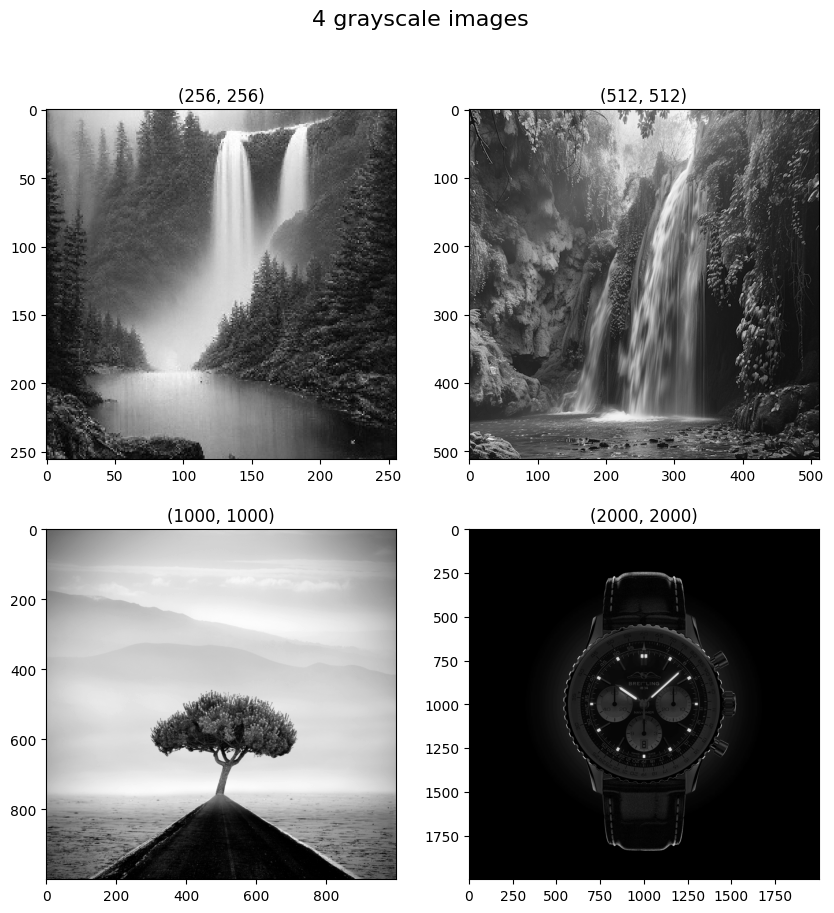

In [3]:
img_256 = Image.open('assets/256x256.png').convert('L')
img_512 = Image.open('assets/512x512.png').convert('L')
img_1000 = Image.open('assets/1000x1000.png').convert('L')
img_2000 = Image.open('assets/2000x2000.png').convert('L')

plt.figure(figsize=(10,10))
plt.suptitle('4 grayscale images', fontsize=16)
plt.subplot(2,2,1).set_title(img_256.size)
plt.imshow(img_256, cmap='gray')
plt.subplot(2,2,2).set_title(img_512.size)
plt.imshow(img_512, cmap='gray')
plt.subplot(2,2,3).set_title(img_1000.size)
plt.imshow(img_1000, cmap='gray')
plt.subplot(2,2,4).set_title(img_2000.size)
plt.imshow(img_2000, cmap='gray')
plt.show()

# Task 2.1

In [4]:
grayscaled_images = ["grayscale_256x256.png", "grayscale_512x512.png", "grayscale_1000x1000.png", "grayscale_2000x2000.png"]
for image_file in grayscaled_images:
    # Open the PNG image
    img = Image.open(f"assets/{image_file}")

    # Convert to JPEG format and save with compression
    img = img.convert("RGB")
    img.save(f"assets/{image_file}_compressed_q85.jpg", "JPEG", quality=85)  # 'quality' ranges from 1 (worst) to 95 (best)
    img.save(f"assets/{image_file}_compressed_q5.jpg", "JPEG", quality=5)

JPEG compression is a commonly used method for reducing the file size of images by removing redundant data. It works by converting the image into frequency components using techniques like Discrete Cosine Transform (DCT), then discarding less noticeable high-frequency details. The quality variable in JPEG compression controls the level of compression: a higher quality value results in less data loss and a clearer image, but with a larger file size, while a lower quality value increases compression and reduces file size at the cost of more noticeable artifacts and reduced image clarity.

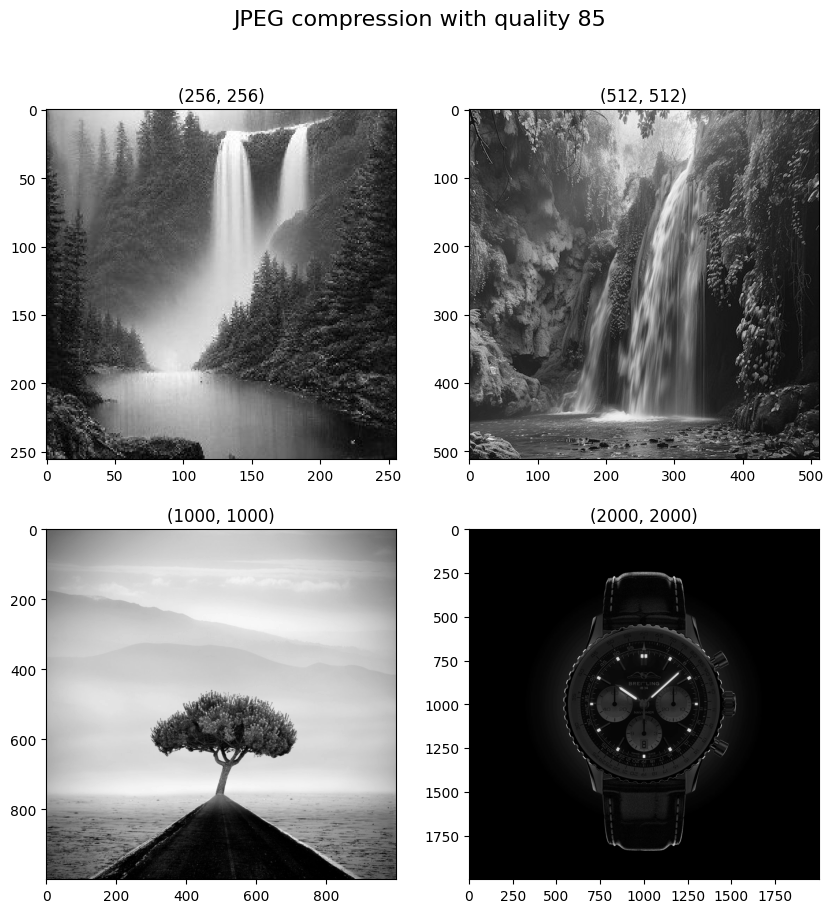

In [5]:
img_256 = Image.open('assets/grayscale_256x256.png_compressed_q85.jpg').convert('L')
img_512 = Image.open('assets/grayscale_512x512.png_compressed_q85.jpg').convert('L')
img_1000 = Image.open('assets/grayscale_1000x1000.png_compressed_q85.jpg').convert('L')
img_2000 = Image.open('assets/grayscale_2000x2000.png_compressed_q85.jpg').convert('L')

plt.figure(figsize=(10,10))
plt.suptitle('JPEG compression with quality 85', fontsize=16)
plt.subplot(2,2,1).set_title(img_256.size)
plt.imshow(img_256, cmap='gray')
plt.subplot(2,2,2).set_title(img_512.size)
plt.imshow(img_512, cmap='gray')
plt.subplot(2,2,3).set_title(img_1000.size)
plt.imshow(img_1000, cmap='gray')
plt.subplot(2,2,4).set_title(img_2000.size)
plt.imshow(img_2000, cmap='gray')
plt.show()

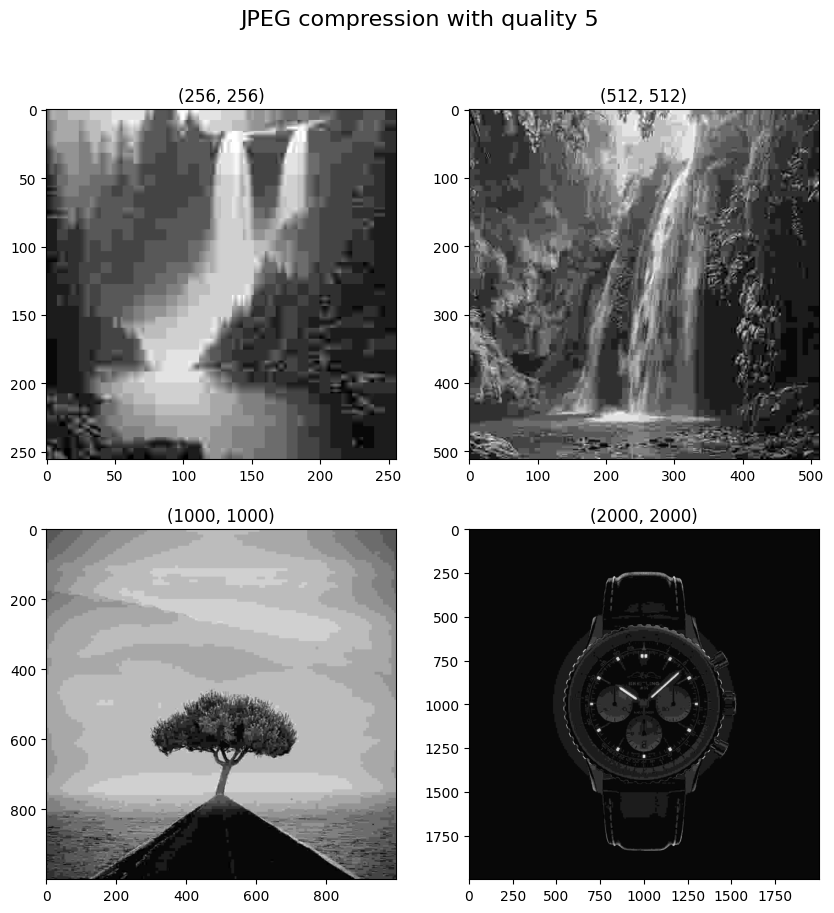

In [6]:
img_256 = Image.open('assets/grayscale_256x256.png_compressed_q5.jpg').convert('L')
img_512 = Image.open('assets/grayscale_512x512.png_compressed_q5.jpg').convert('L')
img_1000 = Image.open('assets/grayscale_1000x1000.png_compressed_q5.jpg').convert('L')
img_2000 = Image.open('assets/grayscale_2000x2000.png_compressed_q5.jpg').convert('L')

plt.figure(figsize=(10,10))
plt.suptitle('JPEG compression with quality 5', fontsize=16)
plt.subplot(2,2,1).set_title(img_256.size)
plt.imshow(img_256, cmap='gray')
plt.subplot(2,2,2).set_title(img_512.size)
plt.imshow(img_512, cmap='gray')
plt.subplot(2,2,3).set_title(img_1000.size)
plt.imshow(img_1000, cmap='gray')
plt.subplot(2,2,4).set_title(img_2000.size)
plt.imshow(img_2000, cmap='gray')
plt.show()

In [7]:
for image_file in grayscaled_images:
    img = Image.open(f"assets/{image_file}")
    img = img.convert("RGB")

    # Convert image to numpy array
    img_array = np.array(img)

    for stddev in [25, 85]:
        # Define Gaussian noise parameters
        mean = 0

        # Generate Gaussian noise
        gaussian_noise = np.random.normal(mean, stddev, img_array.shape)

        # Add the Gaussian noise to the image
        noisy_img_array = img_array + gaussian_noise

        # Ensure pixel values are within [0, 255] range
        noisy_img_array = np.clip(noisy_img_array, 0, 255).astype(np.uint8)

        # Convert back to a PIL image
        noisy_img = Image.fromarray(noisy_img_array)

        noisy_img.save(f"assets/gaussian{stddev}_{image_file}")

Gaussian noise is a type of statistical noise that is commonly added to images to simulate real-world imperfections, such as sensor or transmission errors. It follows a normal distribution, where the noise values are drawn from a Gaussian distribution. The two key parameters of Gaussian noise are the mean and standard deviation (variance). The mean determines the average value of the noise, typically set to zero for symmetric noise around the original pixel values, while the variance controls the spread or intensity of the noise—higher variance results in more noticeable distortion in the image.

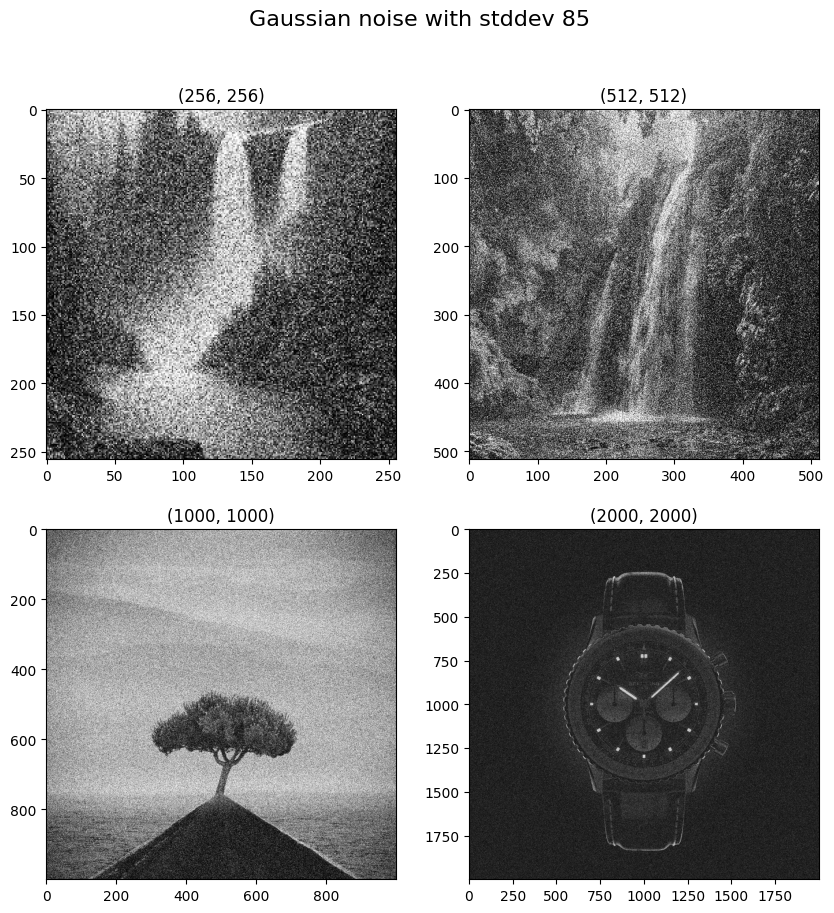

In [8]:
img_256 = Image.open('assets/gaussian85_grayscale_256x256.png').convert('L')
img_512 = Image.open('assets/gaussian85_grayscale_512x512.png').convert('L')
img_1000 = Image.open('assets/gaussian85_grayscale_1000x1000.png').convert('L')
img_2000 = Image.open('assets/gaussian85_grayscale_2000x2000.png').convert('L')

plt.figure(figsize=(10,10))
plt.suptitle('Gaussian noise with stddev 85', fontsize=16)
plt.subplot(2,2,1).set_title(img_256.size)
plt.imshow(img_256, cmap='gray')
plt.subplot(2,2,2).set_title(img_512.size)
plt.imshow(img_512, cmap='gray')
plt.subplot(2,2,3).set_title(img_1000.size)
plt.imshow(img_1000, cmap='gray')
plt.subplot(2,2,4).set_title(img_2000.size)
plt.imshow(img_2000, cmap='gray')
plt.show()

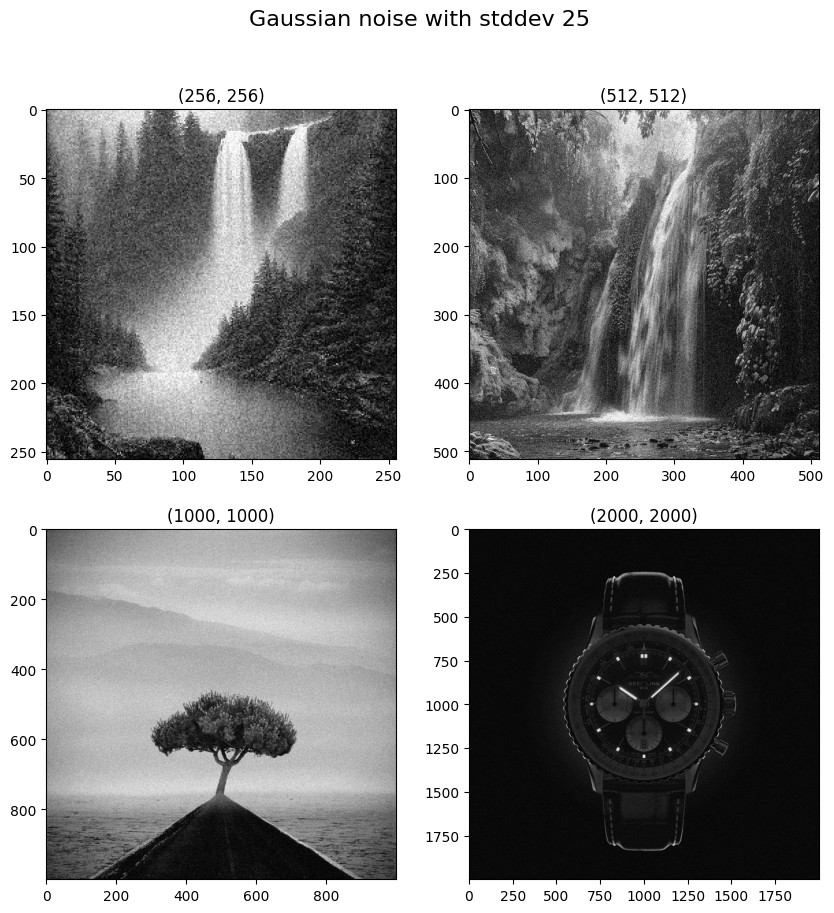

In [9]:
img_256 = Image.open('assets/gaussian25_grayscale_256x256.png').convert('L')
img_512 = Image.open('assets/gaussian25_grayscale_512x512.png').convert('L')
img_1000 = Image.open('assets/gaussian25_grayscale_1000x1000.png').convert('L')
img_2000 = Image.open('assets/gaussian25_grayscale_2000x2000.png').convert('L')

plt.figure(figsize=(10,10))
plt.suptitle('Gaussian noise with stddev 25', fontsize=16)
plt.subplot(2,2,1).set_title(img_256.size)
plt.imshow(img_256, cmap='gray')
plt.subplot(2,2,2).set_title(img_512.size)
plt.imshow(img_512, cmap='gray')
plt.subplot(2,2,3).set_title(img_1000.size)
plt.imshow(img_1000, cmap='gray')
plt.subplot(2,2,4).set_title(img_2000.size)
plt.imshow(img_2000, cmap='gray')
plt.show()

# Task 3

**Mean Squared Error (MSE)** is a basic and widely used metric for evaluating image quality by measuring the average squared difference between corresponding pixel values of two images. It provides a straightforward way to quantify the distortion or error introduced by compression or gaussian noise. The smaller the MSE value, the closer the distorted image is to the original, with an MSE of 0 indicating identical images.

The formula of MSE is:
$$\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (Y_i - \hat{Y}_i)^2$$

- $n$ is the total number of pixels in the image.
- $Y_i$ represents the pixel value of the original image.
- $\hat{Y}_i$ represents the pixel value of the distorted image.


In [10]:
# Function to compute MSE between two images
def mse(imageA, imageB):
    # Compute the mean squared error
    err = np.sum((imageA.astype("float") - imageB.astype("float")) ** 2)
    err /= float(imageA.shape[0] * imageA.shape[1])
    
    return err

# Load images (grayscale images)
for image_file in grayscaled_images:
    original = cv2.imread(f"assets/{image_file}", cv2.IMREAD_GRAYSCALE)
    jpeg_compressed_q85 = cv2.imread(f"assets/{image_file}_compressed_q85.jpg", cv2.IMREAD_GRAYSCALE)
    jpeg_compressed_q5 = cv2.imread(f"assets/{image_file}_compressed_q5.jpg", cv2.IMREAD_GRAYSCALE)
    gaussian_noise_85 = cv2.imread(f"assets/gaussian85_{image_file}", cv2.IMREAD_GRAYSCALE)
    gaussian_noise_25 = cv2.imread(f"assets/gaussian25_{image_file}", cv2.IMREAD_GRAYSCALE)

    # Calculate MSE between the original and distorted images
    mse_jpeg_85 = mse(original, jpeg_compressed_q85)
    mse_jpeg_5 = mse(original, jpeg_compressed_q5)
    mse_noise_85 = mse(original, gaussian_noise_85)
    mse_noise_25 = mse(original, gaussian_noise_25)

    print(image_file)
    print(f"MSE for JPEG compressed q85 image: {mse_jpeg_85}")
    print(f"MSE for JPEG compressed q5 image: {mse_jpeg_5}")
    print(f"MSE for image with Gaussian noise 85: {mse_noise_85}")
    print(f"MSE for image with Gaussian noise 25: {mse_noise_25}\n")

grayscale_256x256.png
MSE for JPEG compressed q85 image: 21.508682250976562
MSE for JPEG compressed q5 image: 239.91409301757812
MSE for image with Gaussian noise 85: 2179.9169311523438
MSE for image with Gaussian noise 25: 259.56446838378906

grayscale_512x512.png
MSE for JPEG compressed q85 image: 18.49268341064453
MSE for JPEG compressed q5 image: 293.5249938964844
MSE for image with Gaussian noise 85: 2221.2241973876953
MSE for image with Gaussian noise 25: 264.8374900817871

grayscale_1000x1000.png
MSE for JPEG compressed q85 image: 2.642072
MSE for JPEG compressed q5 image: 74.442835
MSE for image with Gaussian noise 85: 2266.058575
MSE for image with Gaussian noise 25: 267.497225

grayscale_2000x2000.png
MSE for JPEG compressed q85 image: 1.05619
MSE for JPEG compressed q5 image: 66.402881
MSE for image with Gaussian noise 85: 2129.8559045
MSE for image with Gaussian noise 25: 184.33983975



libpng warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


We can compare the results and the observations. As we can see there is much more distortion with gaussian noise 85 that 25. In fact our computed results show that MSE for gaussian 85 is much higher than MSE for gaussian 25. Same observation for JPEG compression.

Also we can notice that JPEG MSE values are much smaller for bigger images. Probably it's due to the fact that as the image size increases, the pixel-level differences introduced by compression are spread over a larger area. In contrast to JPEG compression, Gaussian noise affects every pixel, and its intensity does not depend on the image size. Therefore, the MSE for Gaussian noise remains more consistent across different image sizes.

**Peak Signal-to-Noise Ratio (PSNR)** is a metric used to evaluate the quality of compressed or distorted images by comparing them to the original. PSNR is measured in decibels (dB) and gives a sense of the image’s fidelity: higher PSNR values indicate better quality, meaning less distortion or noise. It is based on the Mean Squared Error (MSE) between the images, and works particularly well for images with slight, uniform distortions.

The formula of PSNR is:
$$\text{PSNR} = 10 \cdot \log_{10} \left( \frac{MAX^2}{\text{MSE}} \right)$$

Where:


- $MAX$ is the maximum possible pixel value of the image (e.g., 255 for 8-bit images).
- $MSE$ is the Mean Squared Error between the original and distorted images.


In [11]:
# Function to compute PSNR
def psnr(imageA, imageB):
    mse_value = mse(imageA, imageB)
    if mse_value == 0:
        return float('inf')  # PSNR is infinite if MSE is zero (identical images)
    max_pixel_value = 255.0
    return 10 * np.log10((max_pixel_value ** 2) / mse_value)

for image_file in grayscaled_images:
    original = cv2.imread(f"assets/{image_file}", cv2.IMREAD_GRAYSCALE)
    jpeg_compressed_q85 = cv2.imread(f"assets/{image_file}_compressed_q85.jpg", cv2.IMREAD_GRAYSCALE)
    jpeg_compressed_q5 = cv2.imread(f"assets/{image_file}_compressed_q5.jpg", cv2.IMREAD_GRAYSCALE)
    gaussian_noise_85 = cv2.imread(f"assets/gaussian85_{image_file}", cv2.IMREAD_GRAYSCALE)
    gaussian_noise_25 = cv2.imread(f"assets/gaussian25_{image_file}", cv2.IMREAD_GRAYSCALE)
    
    psnr_jpeg_85 = psnr(original, jpeg_compressed_q85)
    psnr_jpeg_5 = psnr(original, jpeg_compressed_q5)
    psnr_noise_85 = psnr(original, gaussian_noise_85)
    psnr_noise_25 = psnr(original, gaussian_noise_25)

    print(image_file)
    print(f"PSNR for JPEG compressed q85 image: {psnr_jpeg_85} dB")
    print(f"PSNR for JPEG compressed q5 image: {psnr_jpeg_5} dB")
    print(f"PSNR for image with Gaussian noise 85: {psnr_noise_85} dB")
    print(f"PSNR for image with Gaussian noise 25: {psnr_noise_25} dB\n")

grayscale_256x256.png
PSNR for JPEG compressed q85 image: 34.80466557112713 dB
PSNR for JPEG compressed q5 image: 24.330246008534 dB
PSNR for image with Gaussian noise 85: 14.74640416359414 dB
PSNR for image with Gaussian noise 25: 23.988351189683456 dB

grayscale_512x512.png
PSNR for JPEG compressed q85 image: 35.46080426134991 dB
PSNR for JPEG compressed q5 image: 23.454352731746777 dB
PSNR for image with Gaussian noise 85: 14.664879649604517 dB
PSNR for image with Gaussian noise 25: 23.901008975353683 dB

grayscale_1000x1000.png
PSNR for JPEG compressed q85 image: 43.91135712321942 dB
PSNR for JPEG compressed q5 image: 29.412574568953232 dB
PSNR for image with Gaussian noise 85: 14.578092291840921 dB
PSNR for image with Gaussian noise 25: 23.857610798319282 dB

grayscale_2000x2000.png
PSNR for JPEG compressed q85 image: 47.893383095932776 dB
PSNR for JPEG compressed q5 image: 29.90893438499001 dB
PSNR for image with Gaussian noise 85: 14.847301386486054 dB
PSNR for image with Gaussi

libpng warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


This time again observations can confirm our results (highter values indicates better quality). However we can see that JPEG results do not decrease when the image size increase. 
The logarithmic nature of PSNR means it compresses the range of values, so differences in MSE have a smaller impact on the resulting PSNR value.

**Structural Similarity Index (SSIM)** is a perceptual metric used to evaluate the quality of an image by measuring the similarity between two images. Unlike PSNR and MSE, which focus on pixel-wise differences, SSIM considers structural information, luminance, and contrast to model how humans perceive image quality. It provides a value between -1 and 1, where 1 indicates perfect similarity between the images. SSIM is particularly useful for capturing perceptual differences in images that may not be reflected by traditional metrics like MSE.

The formula of SSIM is:
$$
\text{SSIM}(x, y) = \frac{(2 \mu_x \mu_y + C_1)(2 \sigma_{xy} + C_2)}{(\mu_x^2 + \mu_y^2 + C_1)(\sigma_x^2 + \sigma_y^2 + C_2)}
$$

Where:
- $\mu_x$ and $\mu_y$ are the mean intensities of images x and y.
- $\sigma_x^2$ and $\sigma_x^2$ are the variances.
- $\sigma_{xy}$ is the covariance between two images.
- $C_1$ and $C_2$ are constants to stabilize the division.

In [12]:
for image_file in grayscaled_images:
    original = cv2.imread(f"assets/{image_file}", cv2.IMREAD_GRAYSCALE)
    jpeg_compressed_q85 = cv2.imread(f"assets/{image_file}_compressed_q85.jpg", cv2.IMREAD_GRAYSCALE)
    jpeg_compressed_q5 = cv2.imread(f"assets/{image_file}_compressed_q5.jpg", cv2.IMREAD_GRAYSCALE)
    gaussian_noise_85 = cv2.imread(f"assets/gaussian85_{image_file}", cv2.IMREAD_GRAYSCALE)
    gaussian_noise_25 = cv2.imread(f"assets/gaussian25_{image_file}", cv2.IMREAD_GRAYSCALE)

    ssim_jpeg_85 = ssim(original, jpeg_compressed_q85)
    ssim_jpeg_5 = ssim(original, jpeg_compressed_q5)
    ssim_noise_85 = ssim(original, gaussian_noise_85)
    ssim_noise_25 = ssim(original, gaussian_noise_25)

    print(image_file)
    print(f"SSIM for JPEG compressed q85 image: {ssim_jpeg_85}")
    print(f"SSIM for JPEG compressed q5 image: {ssim_jpeg_5}")
    print(f"SSIM for image with Gaussian noise 85: {ssim_noise_85}")
    print(f"SSIM for image with Gaussian noise 25: {ssim_noise_25}\n")

grayscale_256x256.png
SSIM for JPEG compressed q85 image: 0.9416431808231807
SSIM for JPEG compressed q5 image: 0.5362863452715882
SSIM for image with Gaussian noise 85: 0.17197410048596215
SSIM for image with Gaussian noise 25: 0.567074543333818

grayscale_512x512.png
SSIM for JPEG compressed q85 image: 0.9618688799688425
SSIM for JPEG compressed q5 image: 0.5797062614359662
SSIM for image with Gaussian noise 85: 0.20335768530332304
SSIM for image with Gaussian noise 25: 0.6134323069697173

grayscale_1000x1000.png
SSIM for JPEG compressed q85 image: 0.9872683859722619
SSIM for JPEG compressed q5 image: 0.8379614795159436
SSIM for image with Gaussian noise 85: 0.062002644051590936
SSIM for image with Gaussian noise 25: 0.27847583512597845



libpng warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


grayscale_2000x2000.png
SSIM for JPEG compressed q85 image: 0.9939585222470035
SSIM for JPEG compressed q5 image: 0.35898882122947356
SSIM for image with Gaussian noise 85: 0.027327794635326058
SSIM for image with Gaussian noise 25: 0.15778515624206635



We can observe that JPEG q85 have a very high results which means that even compressed they are very similar to the original. 1000x1000 jpeg compressed image with q5 has an unexpectedly high result compare to other, it can be due to initial quality of the image. Another reason may be the perception of artifacts on the image can vary depending on the image size and the nature of the image content.

**Learned Perceptual Image Patch Similarity (LPIPS)** is a modern perceptual metric designed to assess the visual similarity between images based on deep learning models. Unlike traditional metrics such as PSNR and SSIM, which rely on pixel-wise comparisons, LPIPS leverages features extracted from pre-trained convolutional neural networks (CNNs) to evaluate perceptual differences more effectively. By comparing feature representations at multiple layers of the network, LPIPS captures more nuanced differences that align with human visual perception. This makes it particularly useful for applications such as image compression, generation, and restoration, where visual fidelity is paramount. The LPIPS score ranges from 0 to 1, with lower values indicating greater similarity between images.

I will use lpips library which implements the algorithm.

In [13]:
for image_file in grayscaled_images:
    original = cv2.imread(f"assets/{image_file}", cv2.IMREAD_GRAYSCALE)
    jpeg_compressed_q85 = cv2.imread(f"assets/{image_file}_compressed_q85.jpg", cv2.IMREAD_GRAYSCALE)
    jpeg_compressed_q5 = cv2.imread(f"assets/{image_file}_compressed_q5.jpg", cv2.IMREAD_GRAYSCALE)
    gaussian_noise_85 = cv2.imread(f"assets/gaussian85_{image_file}", cv2.IMREAD_GRAYSCALE)
    gaussian_noise_25 = cv2.imread(f"assets/gaussian25_{image_file}", cv2.IMREAD_GRAYSCALE)

    # Convert grayscale to RGB by repeating the channel and normalize
    original_rgb = cv2.cvtColor(original, cv2.COLOR_GRAY2RGB) / 255.0
    jpeg_compressed_85_rgb = cv2.cvtColor(jpeg_compressed_q85, cv2.COLOR_GRAY2RGB) / 255.0
    jpeg_compressed_5_rgb = cv2.cvtColor(jpeg_compressed_q5, cv2.COLOR_GRAY2RGB) / 255.0
    gaussian_noise_85_rgb = cv2.cvtColor(gaussian_noise_85, cv2.COLOR_GRAY2RGB) / 255.0
    gaussian_noise_25_rgb = cv2.cvtColor(gaussian_noise_25, cv2.COLOR_GRAY2RGB) / 255.0

    # Convert NumPy arrays to PyTorch tensors
    original_tensor = torch.from_numpy(original_rgb).permute(2, 0, 1).float()  # Shape: (C, H, W)
    jpeg_compressed_85_tensor = torch.from_numpy(jpeg_compressed_85_rgb).permute(2, 0, 1).float()
    jpeg_compressed_5_tensor = torch.from_numpy(jpeg_compressed_5_rgb).permute(2, 0, 1).float()
    gaussian_noise_85_tensor = torch.from_numpy(gaussian_noise_85_rgb).permute(2, 0, 1).float()
    gaussian_noise_25_tensor = torch.from_numpy(gaussian_noise_25_rgb).permute(2, 0, 1).float()

    lpips_model = lpips.LPIPS(net='vgg')

    # Calculate LPIPS
    lpips_jpeg_85 = lpips_model(original_tensor.unsqueeze(0), jpeg_compressed_85_tensor.unsqueeze(0)).item()  # Add batch dimension
    lpips_jpeg_5 = lpips_model(original_tensor.unsqueeze(0), jpeg_compressed_5_tensor.unsqueeze(0)).item()
    lpips_noise_85 = lpips_model(original_tensor.unsqueeze(0), gaussian_noise_85_tensor.unsqueeze(0)).item()
    lpips_noise_25 = lpips_model(original_tensor.unsqueeze(0), gaussian_noise_25_tensor.unsqueeze(0)).item()

    print(image_file)
    print(f"LPIPS for JPEG compressed 85 image: {lpips_jpeg_85}")
    print(f"LPIPS for JPEG compressed 5 image: {lpips_jpeg_5}")
    print(f"LPIPS for image with Gaussian noise 85: {lpips_noise_85}")
    print(f"LPIPS for image with Gaussian noise 25: {lpips_noise_25}\n")

Setting up [LPIPS] perceptual loss: trunk [vgg], v[0.1], spatial [off]


/Users/denisfedosov/Library/Caches/pypoetry/virtualenvs/df-p3ghjSHb-py3.12/lib/python3.12/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/denisfedosov/Library/Caches/pypoetry/virtualenvs/df-p3ghjSHb-py3.12/lib/python3.12/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Loading model from: /Users/denisfedosov/Library/Caches/pypoetry/virtualenvs/df-p3ghjSHb-py3.12/lib/python3.12/site-packages/lpips/weights/v0.1/vgg.pth


/Users/denisfedosov/Library/Caches/pypoetry/virtualenvs/df-p3ghjSHb-py3.12/lib/python3.12/site-packages/lpips/lpips.py:107: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  sel

grayscale_256x256.png
LPIPS for JPEG compressed 85 image: 0.06532569229602814
LPIPS for JPEG compressed 5 image: 0.6539527773857117
LPIPS for image with Gaussian noise 85: 0.5837596654891968
LPIPS for image with Gaussian noise 25: 0.36653390526771545

Setting up [LPIPS] perceptual loss: trunk [vgg], v[0.1], spatial [off]
Loading model from: /Users/denisfedosov/Library/Caches/pypoetry/virtualenvs/df-p3ghjSHb-py3.12/lib/python3.12/site-packages/lpips/weights/v0.1/vgg.pth
grayscale_512x512.png
LPIPS for JPEG compressed 85 image: 0.054089441895484924
LPIPS for JPEG compressed 5 image: 0.5784404873847961
LPIPS for image with Gaussian noise 85: 0.6321432590484619
LPIPS for image with Gaussian noise 25: 0.3919237554073334

Setting up [LPIPS] perceptual loss: trunk [vgg], v[0.1], spatial [off]
Loading model from: /Users/denisfedosov/Library/Caches/pypoetry/virtualenvs/df-p3ghjSHb-py3.12/lib/python3.12/site-packages/lpips/weights/v0.1/vgg.pth
grayscale_1000x1000.png
LPIPS for JPEG compressed 85

libpng warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


Setting up [LPIPS] perceptual loss: trunk [vgg], v[0.1], spatial [off]
Loading model from: /Users/denisfedosov/Library/Caches/pypoetry/virtualenvs/df-p3ghjSHb-py3.12/lib/python3.12/site-packages/lpips/weights/v0.1/vgg.pth
grayscale_2000x2000.png
LPIPS for JPEG compressed 85 image: 0.012160254642367363
LPIPS for JPEG compressed 5 image: 0.130621999502182
LPIPS for image with Gaussian noise 85: 0.7945305109024048
LPIPS for image with Gaussian noise 25: 0.5806485414505005



As before JPEG q85 compression provides excellent visual quality across all sizes, with low perceptual distortion.
JPEG q5 has a greater impact on smaller images, with distortion becoming less noticeable in larger images.
Gaussian Noise leads to high perceptual degradation

# Conclusion


JPEG compression q85: this compression level consistently results in low distortion metrics (MSE, PSNR, SSIM, LPIPS) across all image sizes, indicating that high-quality compression preserves visual fidelity effectively.

JPEG compression q5: this setting introduces significant degradation, especially in smaller images. Higher distortion metrics suggest that low-quality compression leads to visible artifacts. However, larger images show a reduction in noticable distortion, suggesting that the spread of artifacts becomes less important as image size increases.

Gaussian nose: noise at higher levels severely impacts image quality. The degradation in quality increases with image size, suggesting that random noise becomes more prominent in larger images.
Lower noise levels still lead to noticeable degradation, but the effects are less severe than with higher noise levels, indicating that even moderate noise can compromise image quality.

The results indicate a clear relationship between image size and the perception of distortion. In general, larger images show improved perceptual quality for high-quality JPEG compression while experiencing greater perceptual disruption from Gaussian noise.